In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
TEST = 'tes'
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [3]:
test_eq(TEST,'test')

AssertionError: ==:
tes
test

In [14]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [6]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

WindowsPath('C:/Users/epzqv/.fastai/data/mnist.pkl.gz')

In [15]:
# https://docs.python.org/3/library/pickle.html#pickle.load
with gzip.open(path, 'rb') as file:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(file, encoding='latin-1')

In [17]:
# map?? # https://www.geeksforgeeks.org/python-map-function/
def addition(n): 
    return n + n 
numbers = (1, 2, 3, 4) 
result = map(addition, numbers) 
print(list(result))

[2, 4, 6, 8]


In [18]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [27]:
n, y_train.shape[0],n==y_train.shape[0], y_train.min(), y_train.max()

(50000, 50000, True, tensor(0), tensor(9))

In [41]:
mpl.rcParams['image.cmap'] = 'gray' # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [42]:
img = x_train[0]

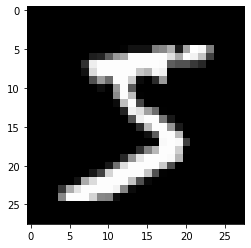

In [43]:
plt.imshow(img.view((28,28)))

In [44]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [45]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(ac):
            for k in range(bc):
                c[i,k] = a[i,j] * b[j,k]
    return c

In [47]:
matmul(np.ndarray([5]),np.ndarray([2]))

NameError: name 'np' is not defined